In [31]:
import sys
import json

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
instance_name = "ft06"  # sys.argv[1]
pso_csv = f"./benchmark/stats_h/{instance_name}_pso.csv"
ga_csv = f"./benchmark/stats_h/{instance_name}_ga.csv"

img_out_path = f"./images_h/{instance_name}.png"

instances_json_path = "./benchmark/instances.json"

In [33]:
benchmarks = json.load(open(instances_json_path))


benchmark = next(
    (item for item in benchmarks if item["name"] == instance_name), None
)
if not benchmark:
    print(f"Instância {instance_name} não encontrada no benchmark.")
    os._exit(1)

benchmark

{'name': 'ft06',
 'jobs': 6,
 'machines': 6,
 'optimum': 55,
 'path': 'instances/ft06'}

In [34]:

optimun = benchmark.get("optimum")

bounds = benchmark.get("bounds")

upper_bound = bounds.get("upper") if bounds else None

lower_bound = bounds.get("lower") if bounds else None

In [35]:
pso_df = pd.read_csv(pso_csv)
ga_df = pd.read_csv(ga_csv)

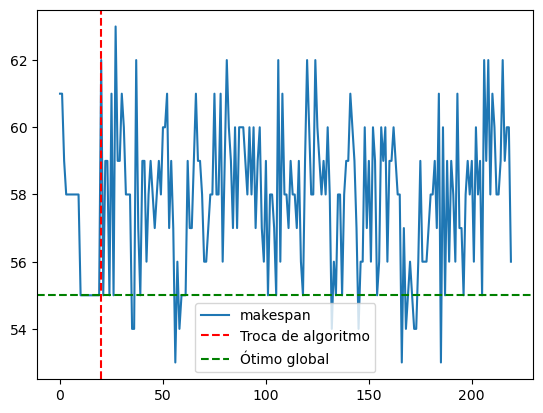

In [36]:
y_column = "makespan"
y = np.concatenate((pso_df[y_column], ga_df[y_column]))

vert_line = len(pso_df)

plt.plot(y, label=y_column)
plt.axvline(x=vert_line, color='r', linestyle='--', label='Troca de algoritmo')
if optimun:
    plt.axhline(y=optimun, color='g', linestyle='--', label='Ótimo global')
if upper_bound:
    plt.axhline(y=upper_bound, color='y',
                linestyle='--', label='Limite superior')
if lower_bound:
    plt.axhline(y=lower_bound, color='y',
                linestyle='--', label='Limite inferior')

plt.legend()